In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [4]:
# Load MNIST dataset
(mnist_trainX, mnist_trainY), (mnist_testX, mnist_testY) = mnist.load_data()

# Load custom dataset
data = np.load('custom_dataset.npz')
custom_trainX = data['trainX']
custom_trainY = data['trainY']
custom_testX = data['testX']
custom_testY = data['testY']

# Print shapes for debugging
print(f"MNIST trainX shape: {mnist_trainX.shape}, trainY shape: {mnist_trainY.shape}")
print(f"Custom trainX shape: {custom_trainX.shape}, trainY shape: {custom_trainY.shape}")

# Preprocess MNIST: Normalize to [0,1] and ensure float32
mnist_trainX = mnist_trainX.astype('float32') / 255.0
mnist_testX = mnist_testX.astype('float32') / 255.0

custom_trainX = custom_trainX.astype('float32') / 255.0
custom_testX = custom_testX.astype('float32') / 255.0
    
# Convert labels to one-hot encoding (for 10 classes: digits 0-9)
mnist_trainY = to_categorical(mnist_trainY, 10)
mnist_testY = to_categorical(mnist_testY, 10)
custom_trainY = to_categorical(custom_trainY, 10)
custom_testY = to_categorical(custom_testY, 10)

# Combine training sets
combined_trainX = np.concatenate([mnist_trainX, custom_trainX], axis=0)
combined_trainY = np.concatenate([mnist_trainY, custom_trainY], axis=0)

combined_trainX, combined_trainY = shuffle(combined_trainX, combined_trainY, random_state=42)



MNIST trainX shape: (60000, 28, 28), trainY shape: (60000,)
Custom trainX shape: (2460, 28, 28), trainY shape: (2460,)


In [5]:
inputs = Input((28, 28))
x = Flatten()(inputs) #--- 2d vector(image) input have to be flatten
x = Dense(1024, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

2025-09-07 15:43:27.207625: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Train the model
history = model.fit(
    combined_trainX, combined_trainY, 
    validation_split=0.2, 
    epochs=15, 
    batch_size=32
)

Epoch 1/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9312 - loss: 0.2278 - val_accuracy: 0.9569 - val_loss: 0.1417
Epoch 2/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.9691 - loss: 0.1020 - val_accuracy: 0.9669 - val_loss: 0.1118
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9778 - loss: 0.0718 - val_accuracy: 0.9663 - val_loss: 0.1211
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9845 - loss: 0.0517 - val_accuracy: 0.9698 - val_loss: 0.1062
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9862 - loss: 0.0436 - val_accuracy: 0.9745 - val_loss: 0.0983
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9667 - val_loss: 0.1489
Epoch 7/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9733 - val_loss: 0.1176
Epoch 8/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9916 -

In [7]:
# Calculate accuracy on custom test set
custom_predY = model.predict(custom_testX)
custom_testY_labels = np.argmax(custom_testY, axis=1)
custom_predY_labels = np.argmax(custom_predY, axis=1)

acc = accuracy_score(custom_testY_labels, custom_predY_labels)
print(f"Accuracy on custom test set: {acc:.4f}")

# Calculate accuracy on MNIST test set
mnist_predY = model.predict(mnist_testX)
mnist_testY_labels = np.argmax(mnist_testY, axis=1)
mnist_predY_labels = np.argmax(mnist_predY, axis=1)

acc = accuracy_score(mnist_testY_labels, mnist_predY_labels)
print(f"Accuracy on MNIST test set: {acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy on custom test set: 0.9205
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy on MNIST test set: 0.9808


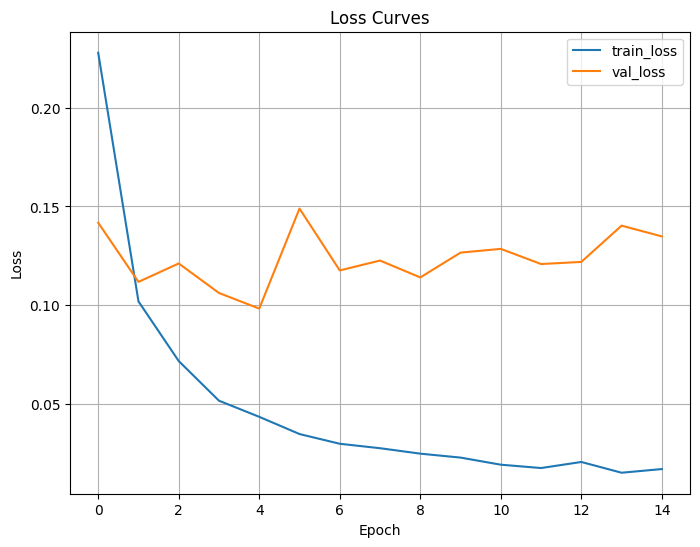

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
    

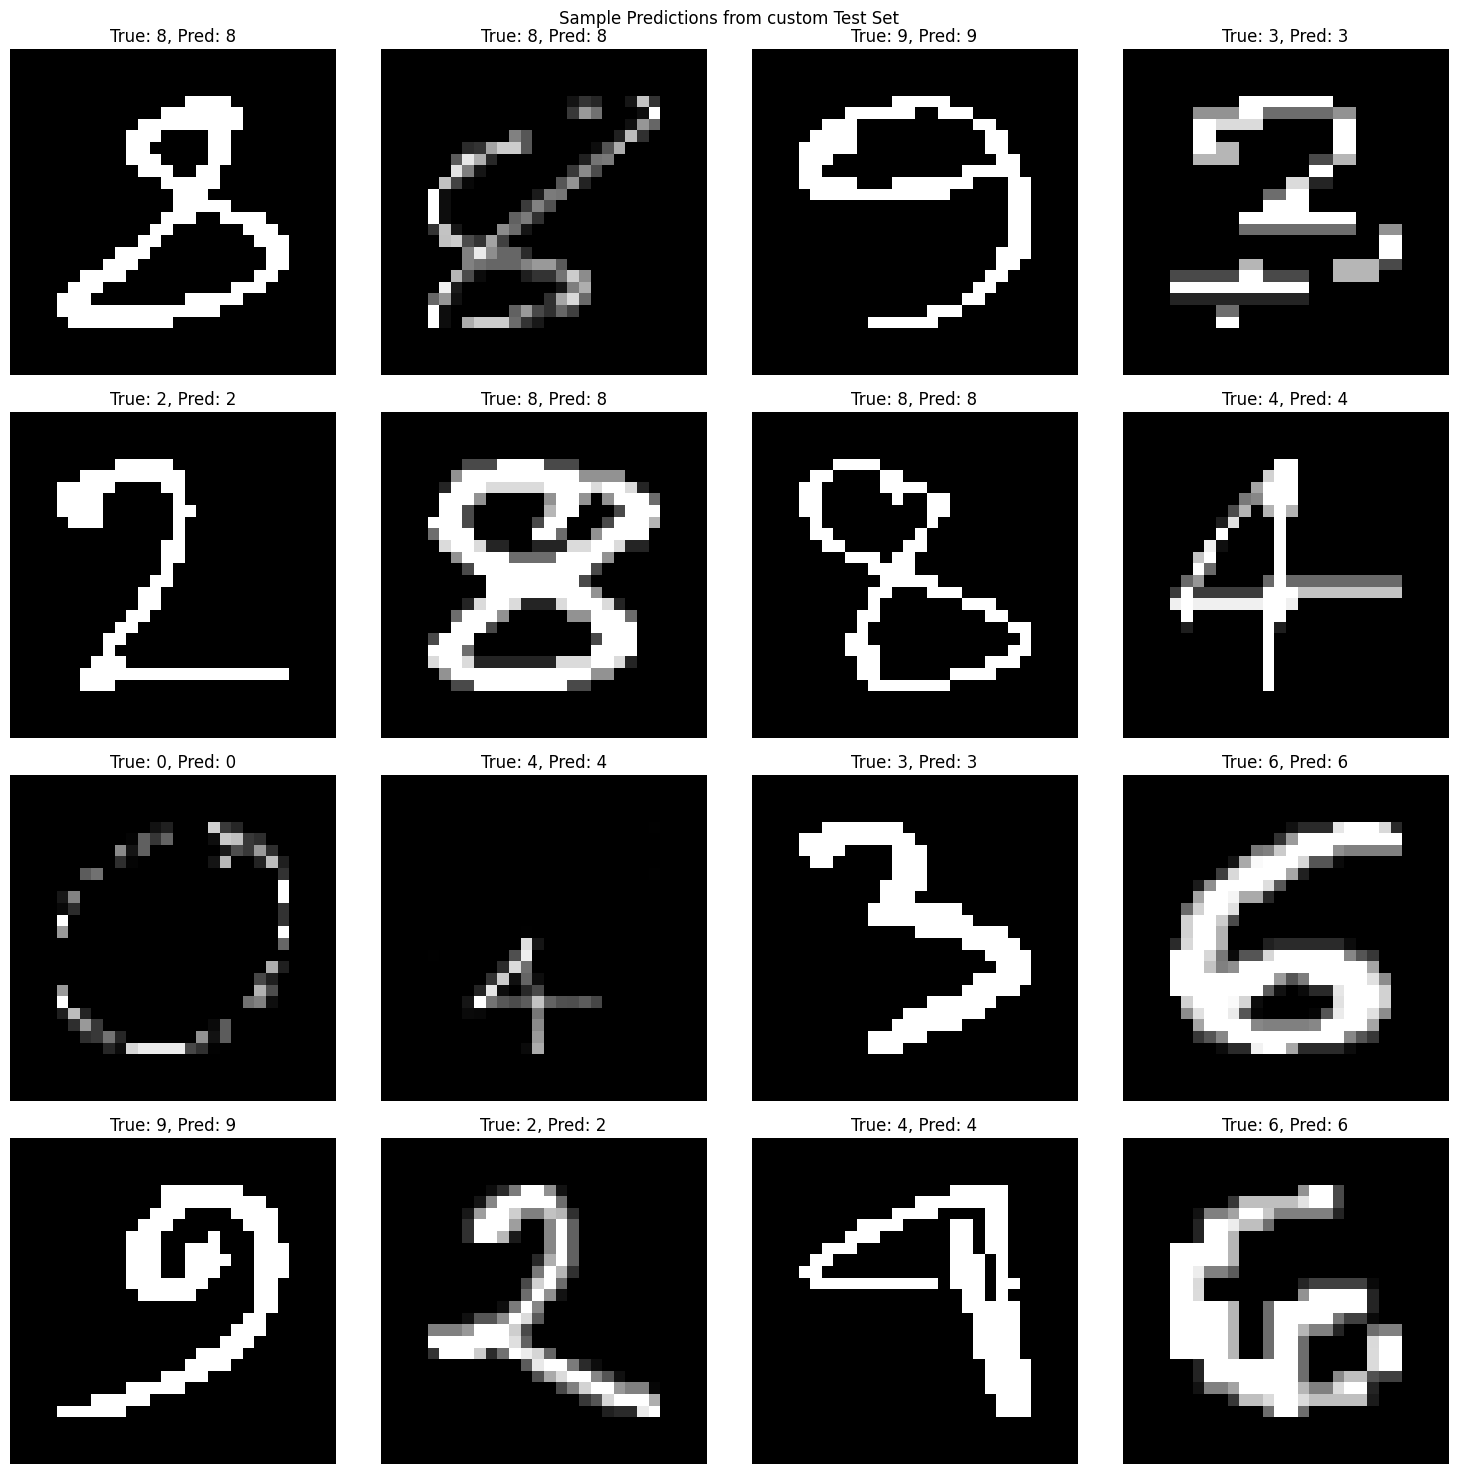

In [ ]:
# Plot sample predictions from custom test set
plt.figure(figsize=(15, 15))
num_samples, rows, cols = 16, 4, 4
for i in range(min(num_samples, len(custom_testX))):
    plt.subplot(rows, cols, i+1)
    plt.axis('off')
    plt.imshow(custom_testX[i], cmap="gray")
    plt.title(f'True: {custom_testY_labels[i]}, Pred: {custom_predY_labels[i]}')
plt.suptitle(f'Sample Predictions from custom Test Set')
plt.tight_layout()
plt.show()